In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [582]:
df =pd.read_csv('winequality-red.csv',sep=';')
# you would need to upload the winequality-red.csv 

In [583]:
test, train = train_test_split(df, test_size=0.5)

In [584]:
#standardization
new_train= (train-train.mean())/train.std()
new_test= (test-train.mean())/train.std()
train_mean=train.mean()['quality']
train_std=train.std()['quality']

In [585]:
y_train=new_train['quality']
y_test=new_test['quality']

In [586]:
x_train= new_train.drop(columns=['quality'])
x_test=new_test.drop(columns=['quality'])

In [587]:
train_bias=[]
for x in range(0,800):
    train_bias.append(1)
test_bias=[]
for y in range(0,799):
    test_bias.append(1)

In [588]:
x_train['Bias']=train_bias
x_test['Bias']= test_bias

In [589]:
x_test.shape[1]

12

In [590]:
#parameters
hidden_units=30
iterations= 1000
learning_rate=0.1
#batch_size=100

In [591]:
n_x_train=x_train.to_numpy()
n_y_train=y_train.to_numpy()
n_x_test=x_test.to_numpy()
n_y_test=y_test.to_numpy()

In [592]:
#tanh activation function
import math

In [593]:
hidden_weight=np.random.rand(x_train.shape[1], 30)

In [594]:
n_y_train=n_y_train.reshape(800,1)
n_y_test=n_y_test.reshape(799,1)

In [595]:

#3 layer neural network, input layer 12 neurons(including the bias neuron), hidden layer 30 neurons , output layer 1 neuron
class Backpropagation(object):
    def __init__(self):
        self.history = {}
        self.history['train_error'] = []
        #self.history['train_acc'] = []
        #self.history['test_acc'] = []
        
    def deriv_tanh(self,x):
        return 1-np.square(x)
    #activation function at both hidden layer and output layer
    def activation(self,x):
        return np.tanh(x)
    def MSE(self,x):
        E=np.square(x)
        return E.mean()
    def backward(self, x_train_s, y_train_s, x_test_s, y_test_s, learning_rate=0.01, n_iters=1000,  hidden_neurons=30,output_neuron=1,verbose=True):
        #weight initialization
        #hidden layer weight initialize (12*30)
        self.hidden_weight=np.random.rand(x_train_s.shape[1], hidden_neurons)
        #output layer weight initialize (30*1) 
        self.output_weight=np.random.rand(hidden_neurons,output_neuron)

        for i in range(n_iters):
            #forward propagation '
            # input to hidden
            hidden_output=np.matmul(x_train_s,self.hidden_weight)
            hidden_output=np.tanh(hidden_output)
            #hidden to output
            Output_output=np.matmul(hidden_output,self.output_weight)
            Output_output=np.tanh(Output_output)
            #Error calculation
            Error=np.subtract(y_train_s,Output_output)
            Delta=-1*(Error*self.deriv_tanh(Output_output))
            #backwardpropagation
            #output to hidden
            self.output_weight-= learning_rate*np.dot(hidden_output.T,Delta)
            #hidden to input
            self.hidden_weight-= learning_rate*np.dot(x_train_s.T,np.dot(Delta,self.output_weight.T)*self.deriv_tanh(hidden_output))

            #record the meansqaure error
            self.history['train_error'].append(self.MSE(Error))
            if verbose:
                if i % 100 == 99: 
                    print('epoch %d, mean sqaure error %.4f, ' % 
                                    (i + 1, self.MSE(Error)))
        plt.plot(model1.history['train_error'], label='train_error')
        plt.legend()
        plt.show()
    #function forward that computes the predictions and error
    def forward(self, x_test,y_test,mean_train,std_train):
        hidden_output=np.matmul(x_test,self.hidden_weight)
        hidden_output=np.tanh(hidden_output)
        Output_output=np.matmul(hidden_output,self.output_weight)
        Output_output=np.tanh(Output_output)
        Error=np.subtract(y_test,Output_output)
        Mean_sqaure_error=self.MSE(Error)
        Output_output= Output_output*std_train+mean_train
        Output_output=Output_output.round()
        print(math.sqrt(Mean_sqaure_error))
        return Output_output

epoch 100, mean sqaure error 0.8554, 
epoch 200, mean sqaure error 0.5821, 
epoch 300, mean sqaure error 0.7464, 
epoch 400, mean sqaure error 0.5633, 
epoch 500, mean sqaure error 0.7202, 
epoch 600, mean sqaure error 0.4784, 
epoch 700, mean sqaure error 0.4570, 
epoch 800, mean sqaure error 0.6822, 
epoch 900, mean sqaure error 0.5351, 
epoch 1000, mean sqaure error 0.4697, 


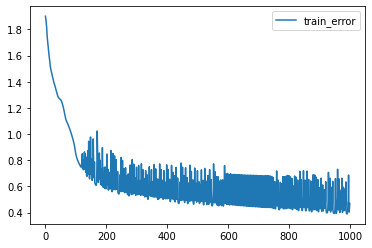

In [596]:
model1=Backpropagation()
model1.backward(n_x_train, n_y_train, n_x_test, n_y_test, learning_rate=0.001, n_iters=1000, verbose=True)

In [597]:
result=model1.forward(n_x_test, n_y_test,train_mean,train_std)

1.0248234287978306


In [599]:
result

array([[6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],